# Sales Performance Dashboard - Exploratory Data Analysis (EDA)

**Objective:** Clean, analyze, and prepare sales data for Tableau visualization and Excel reporting

**Key Deliverables:**
1. Data quality assessment and cleaning
2. Feature engineering (monthly metrics, customer segments)
3. Statistical analysis and insights
4. Export clean datasets for BI tools

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries loaded successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries loaded successfully
Pandas version: 2.3.3
NumPy version: 2.4.1


## 1. Data Loading & Initial Exploration

In [2]:
# Load the raw dataset
df = pd.read_csv('../data/sales_data_raw.csv', parse_dates=['order_date'])

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nDate Range: {df['order_date'].min().date()} to {df['order_date'].max().date()}")
print(f"Data Collection Period: {(df['order_date'].max() - df['order_date'].min()).days} days")

DATASET OVERVIEW

Shape: 50,000 rows × 12 columns
Memory Usage: 13.87 MB

Date Range: 2023-01-01 to 2025-09-02
Data Collection Period: 975 days


In [3]:
# Display first few records
print("\nFirst 10 Records:")
df.head(10)


First 10 Records:


,transaction_id,order_date,customer_id,product_id,product_category,quantity,unit_price,discount,revenue,region,sales_channel,customer_type
0,106173,2023-01-01,9243,5417,Health & Wellness,2,266.26,0.10,479.27,Central,Online,Returning
1,128560,2023-01-03,10369,5388,Sports & Outdoors,2,559.82,0.00,1119.64,Central,Online,Returning
2,147363,2023-01-03,1059,5499,Books,1,52.48,0.20,41.98,South,Online,New
3,137886,2023-01-03,5532,5146,Clothing,1,182.10,0.00,182.10,North,Offline,Returning
4,118475,2023-01-04,6144,5368,Beauty & Personal Care,5,121.21,0.15,515.14,West,Online,Returning
5,133074,2023-01-04,8784,5355,Books,6,9.79,0.00,58.74,East,Online,Returning
6,138465,2023-01-04,7989,5427,Electronics,4,923.06,0.05,3507.63,North,Online,New
7,115657,2023-01-04,8979,5323,Beauty & Personal Care,1,123.96,0.05,117.76,Central,Offline,Returning
8,130152,2023-01-04,10108,5437,Health & Wellness,4,64.86,0.05,246.47,North,Online,Returning
9,107128,2023-01-04,4470,5043,Books,2,45.70,0.10,82.26,Central,Online,Returning


In [4]:
# Data types and structure
print("\n" + "="*70)
print("DATA TYPES & STRUCTURE")
print("="*70)
df.info()


DATA TYPES & STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    50000 non-null  int64         
 1   order_date        50000 non-null  datetime64[ns]
 2   customer_id       50000 non-null  int64         
 3   product_id        50000 non-null  int64         
 4   product_category  50000 non-null  object        
 5   quantity          50000 non-null  int64         
 6   unit_price        50000 non-null  float64       
 7   discount          50000 non-null  float64       
 8   revenue           50000 non-null  float64       
 9   region            50000 non-null  object        
 10  sales_channel     50000 non-null  object        
 11  customer_type     50000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 4.6+ MB


In [5]:
# Summary statistics
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)
df.describe()


SUMMARY STATISTICS


,transaction_id,order_date,customer_id,product_id,quantity,unit_price,discount,revenue
count,50000.00,50000,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,125000.50,2023-11-08 02:25:28.128000,6020.44,5250.86,2.66,296.22,0.06,735.09
min,100001.00,2023-01-01 00:00:00,1001.00,5001.00,1.00,5.00,0.00,4.53
25%,112500.75,2023-06-26 00:00:00,3511.00,5126.00,1.00,57.13,0.00,99.23
50%,125000.50,2023-10-16 00:00:00,6031.00,5251.00,2.00,123.70,0.05,253.31
75%,137500.25,2024-03-01 00:00:00,8542.00,5375.00,4.00,336.86,0.10,719.84
max,150000.00,2025-09-02 00:00:00,11000.00,5500.00,10.00,1999.93,0.25,19228.30
std,14433.90,NaN,2892.76,144.01,1.92,413.38,0.07,1370.66


## 2. Data Quality Assessment

In [6]:
# Check for missing values
print("="*70)
print("DATA QUALITY REPORT")
print("="*70)

missing_data = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

quality_report = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_pct
})
quality_report = quality_report[quality_report['Missing Values'] > 0]

if len(quality_report) == 0:
    print("\n✓ No missing values detected!")
else:
    print("\n⚠ Missing values detected:")
    print(quality_report)

# Check for duplicates
duplicates = df['transaction_id'].duplicated().sum()
print(f"\nDuplicate Transactions: {duplicates}")

# Check for negative values
negative_revenue = (df['revenue'] < 0).sum()
negative_qty = (df['quantity'] < 0).sum()
print(f"Negative Revenue Records: {negative_revenue}")
print(f"Negative Quantity Records: {negative_qty}")

# Data integrity checks
print(f"\nUnique Transactions: {df['transaction_id'].nunique():,}")
print(f"Unique Customers: {df['customer_id'].nunique():,}")
print(f"Unique Products: {df['product_id'].nunique():,}")
print(f"Product Categories: {df['product_category'].nunique()}")

DATA QUALITY REPORT

✓ No missing values detected!

Duplicate Transactions: 0
Negative Revenue Records: 0
Negative Quantity Records: 0

Unique Transactions: 50,000
Unique Customers: 9,939
Unique Products: 500
Product Categories: 12


## 3. Feature Engineering

In [7]:
# Extract temporal features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['quarter'] = df['order_date'].dt.quarter
df['day_of_week'] = df['order_date'].dt.dayofweek
df['day_name'] = df['order_date'].dt.day_name()
df['month_name'] = df['order_date'].dt.month_name()
df['year_month'] = df['order_date'].dt.to_period('M').astype(str)
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Calculate gross revenue (before discount)
df['gross_revenue'] = df['quantity'] * df['unit_price']
df['discount_amount'] = df['gross_revenue'] * df['discount']

# Create discount category
df['discount_category'] = pd.cut(
    df['discount'],
    bins=[-0.01, 0, 0.05, 0.10, 0.15, 0.20, 1.0],
    labels=['No Discount', '1-5%', '6-10%', '11-15%', '16-20%', '20%+']
)

# Create revenue segments
df['revenue_segment'] = pd.cut(
    df['revenue'],
    bins=[0, 50, 200, 500, 1000, float('inf')],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

print("✓ Feature engineering completed")
print(f"\nNew features created: {len(['year', 'month', 'quarter', 'day_of_week', 'day_name', 'month_name', 'year_month', 'is_weekend', 'gross_revenue', 'discount_amount', 'discount_category', 'revenue_segment'])}")
print(f"Total columns: {df.shape[1]}")

✓ Feature engineering completed

New features created: 12
Total columns: 24


In [8]:
# Customer-level features
customer_features = df.groupby('customer_id').agg({
    'transaction_id': 'count',
    'revenue': 'sum',
    'order_date': ['min', 'max'],
    'product_category': 'nunique'
}).reset_index()

customer_features.columns = ['customer_id', 'total_purchases', 'lifetime_value', 
                              'first_purchase', 'last_purchase', 'category_diversity']

customer_features['customer_tenure_days'] = (
    customer_features['last_purchase'] - customer_features['first_purchase']
).dt.days

customer_features['avg_order_value'] = (
    customer_features['lifetime_value'] / customer_features['total_purchases']
)

# RFM scores
customer_features['recency_days'] = (
    df['order_date'].max() - customer_features['last_purchase']
).dt.days

# Assign RFM segments
customer_features['rfm_segment'] = pd.cut(
    customer_features['lifetime_value'],
    bins=[0, 500, 2000, 5000, float('inf')],
    labels=['Bronze', 'Silver', 'Gold', 'Platinum']
)

print("✓ Customer-level features created")
print(f"\nCustomer Feature Set Shape: {customer_features.shape}")
customer_features.head()

✓ Customer-level features created

Customer Feature Set Shape: (9939, 10)


,customer_id,total_purchases,lifetime_value,first_purchase,last_purchase,category_diversity,customer_tenure_days,avg_order_value,recency_days,rfm_segment
0,1001,3,231.07,2023-08-20,2024-08-19,3,365,77.02,379,Bronze
1,1002,10,4133.55,2023-03-16,2025-01-29,6,685,413.35,216,Gold
2,1003,6,1477.13,2023-04-24,2024-02-20,3,302,246.19,560,Silver
3,1004,7,6808.90,2023-03-16,2023-10-28,5,226,972.70,675,Platinum
4,1005,7,1771.53,2023-03-02,2024-02-01,4,336,253.08,579,Silver


## 4. Exploratory Data Analysis & Visualizations

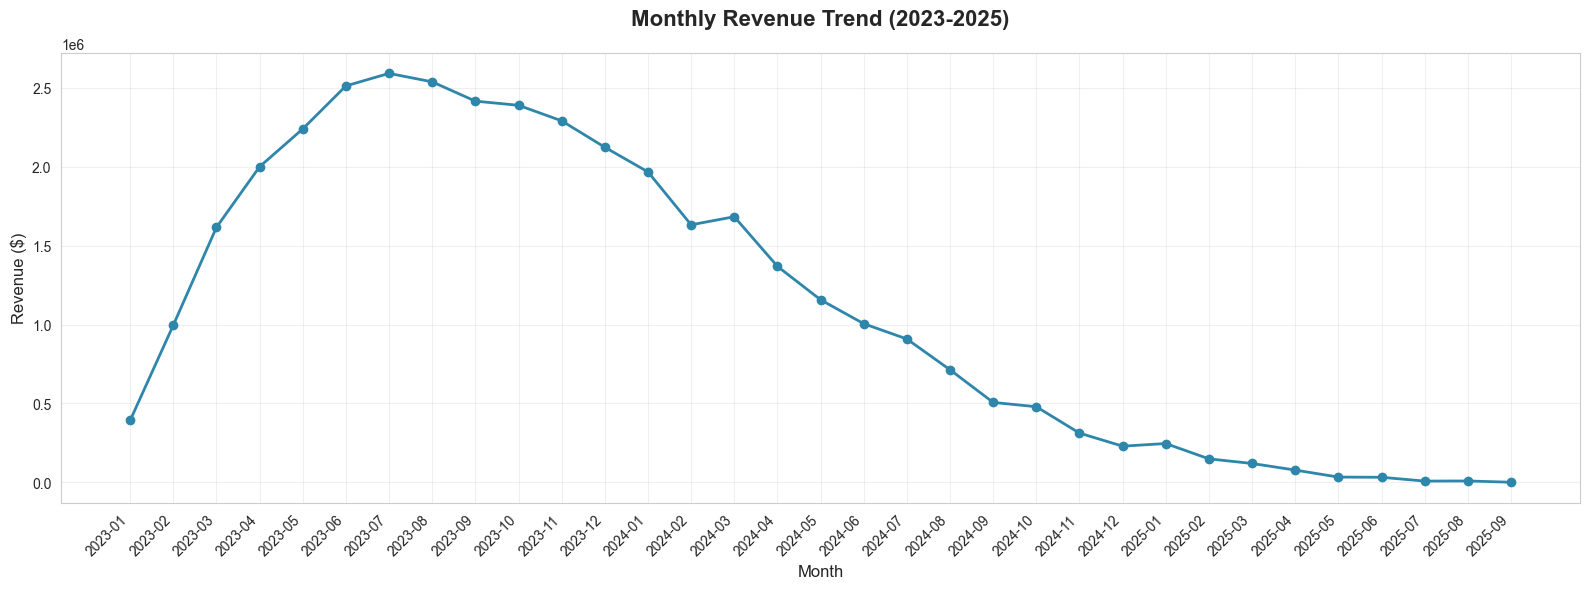


Total Revenue: $36,754,735.77
Average Monthly Revenue: $1,113,779.87


In [9]:
# Revenue trend over time
monthly_revenue = df.groupby('year_month')['revenue'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values('year_month')

plt.figure(figsize=(16, 6))
plt.plot(monthly_revenue['year_month'], monthly_revenue['revenue'], 
         marker='o', linewidth=2, markersize=6, color='#2E86AB')
plt.title('Monthly Revenue Trend (2023-2025)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/monthly_revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal Revenue: ${monthly_revenue['revenue'].sum():,.2f}")
print(f"Average Monthly Revenue: ${monthly_revenue['revenue'].mean():,.2f}")

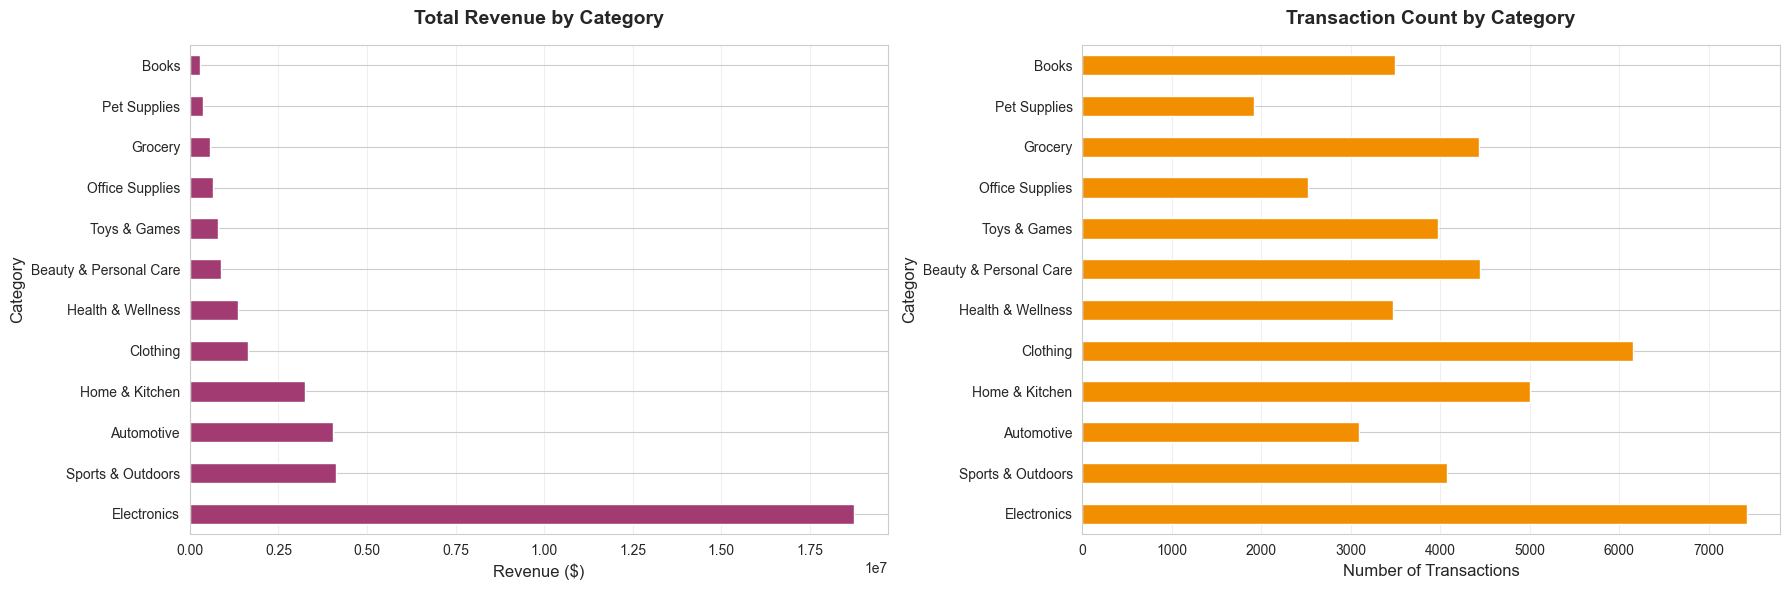


Top 3 Categories by Revenue:
                      revenue  transaction_id
product_category                             
Electronics       18756617.33            7426
Sports & Outdoors  4133634.27            4074
Automotive         4043602.37            3091


In [10]:
# Category performance
category_revenue = df.groupby('product_category').agg({
    'revenue': 'sum',
    'transaction_id': 'count'
}).sort_values('revenue', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Revenue by category
category_revenue['revenue'].plot(kind='barh', ax=axes[0], color='#A23B72')
axes[0].set_title('Total Revenue by Category', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Revenue ($)', fontsize=12)
axes[0].set_ylabel('Category', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='x')

# Transaction count by category
category_revenue['transaction_id'].plot(kind='barh', ax=axes[1], color='#F18F01')
axes[1].set_title('Transaction Count by Category', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Number of Transactions', fontsize=12)
axes[1].set_ylabel('Category', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../data/category_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 3 Categories by Revenue:")
print(category_revenue.head(3))

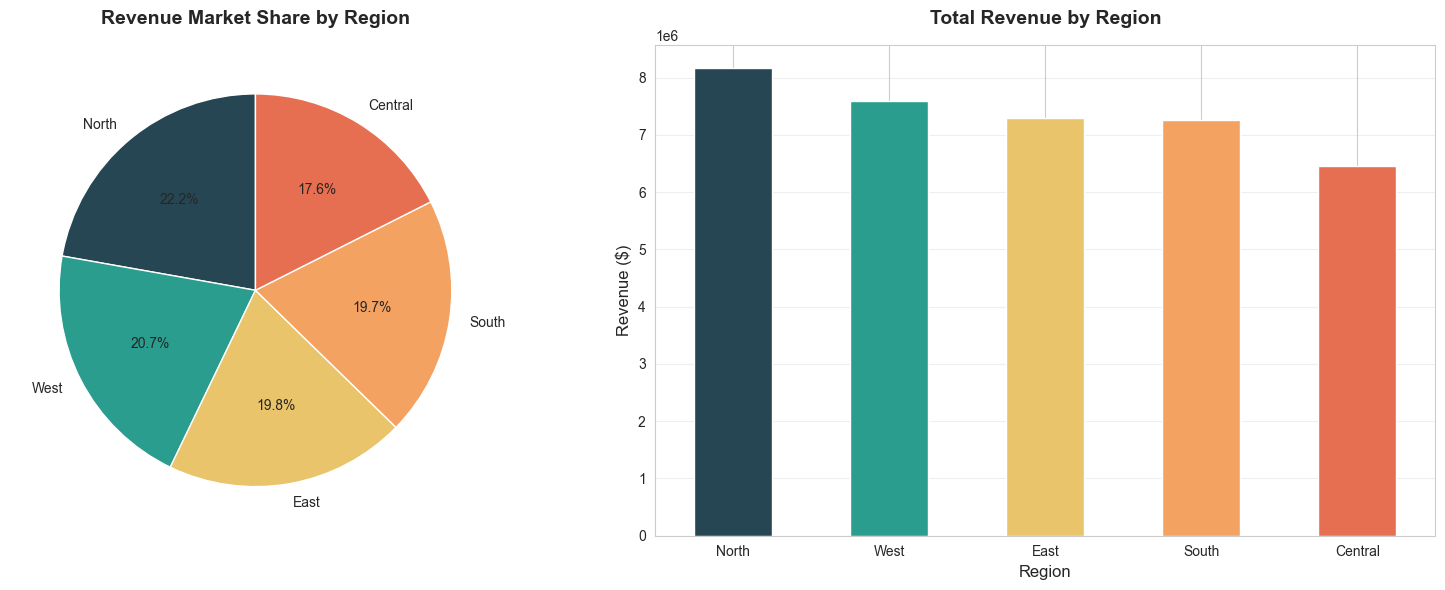


Regional Performance Summary:
           revenue  customer_id  transaction_id  market_share
region                                                       
North   8162750.53         6638           11018         22.21
West    7590708.57         6331           10047         20.65
East    7291341.02         6290            9887         19.84
South   7254146.37         6354           10058         19.74
Central 6455789.28         5942            8990         17.56


In [11]:
# Regional performance
region_performance = df.groupby('region').agg({
    'revenue': 'sum',
    'customer_id': 'nunique',
    'transaction_id': 'count'
}).sort_values('revenue', ascending=False)

# Calculate market share
region_performance['market_share'] = (
    region_performance['revenue'] / region_performance['revenue'].sum() * 100
)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart for market share
colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
axes[0].pie(region_performance['revenue'], labels=region_performance.index,
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Revenue Market Share by Region', fontsize=14, fontweight='bold', pad=15)

# Bar chart for revenue
region_performance['revenue'].plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Total Revenue by Region', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Region', fontsize=12)
axes[1].set_ylabel('Revenue ($)', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/regional_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nRegional Performance Summary:")
print(region_performance)


SALES CHANNEL PERFORMANCE
               Total Revenue  Avg Order Value  Transactions  Customers  \
sales_channel                                                            
Offline          14424902.17           722.33         19970       8664   
Online           22329833.60           743.58         30030       9535   

               Revenue Share %  
sales_channel                   
Offline                  39.25  
Online                   60.75  


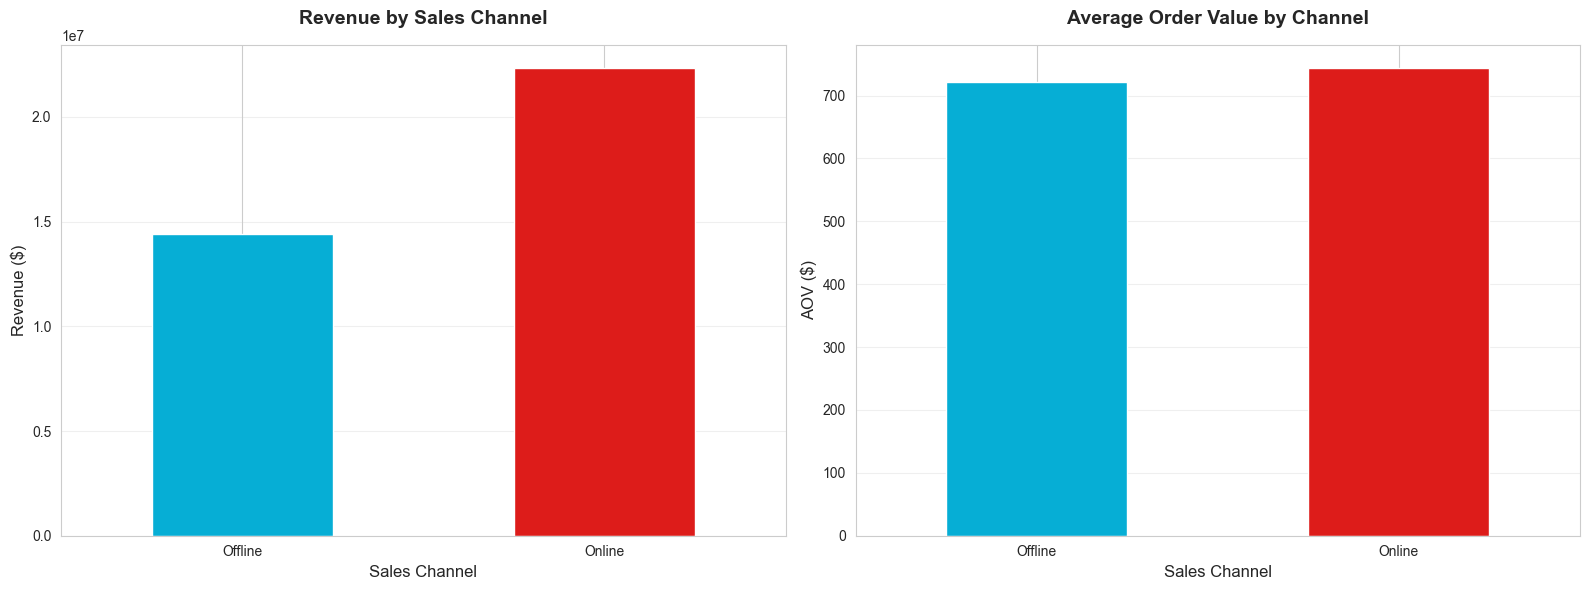

In [12]:
# Sales channel analysis
channel_analysis = df.groupby('sales_channel').agg({
    'revenue': ['sum', 'mean'],
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).round(2)

channel_analysis.columns = ['Total Revenue', 'Avg Order Value', 'Transactions', 'Customers']
channel_analysis['Revenue Share %'] = (
    channel_analysis['Total Revenue'] / channel_analysis['Total Revenue'].sum() * 100
).round(2)

print("\n" + "="*70)
print("SALES CHANNEL PERFORMANCE")
print("="*70)
print(channel_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

channel_analysis['Total Revenue'].plot(kind='bar', ax=axes[0], color=['#06AED5', '#DD1C1A'])
axes[0].set_title('Revenue by Sales Channel', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Sales Channel', fontsize=12)
axes[0].set_ylabel('Revenue ($)', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

channel_analysis['Avg Order Value'].plot(kind='bar', ax=axes[1], color=['#06AED5', '#DD1C1A'])
axes[1].set_title('Average Order Value by Channel', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Sales Channel', fontsize=12)
axes[1].set_ylabel('AOV ($)', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/channel_performance.png', dpi=300, bbox_inches='tight')
plt.show()

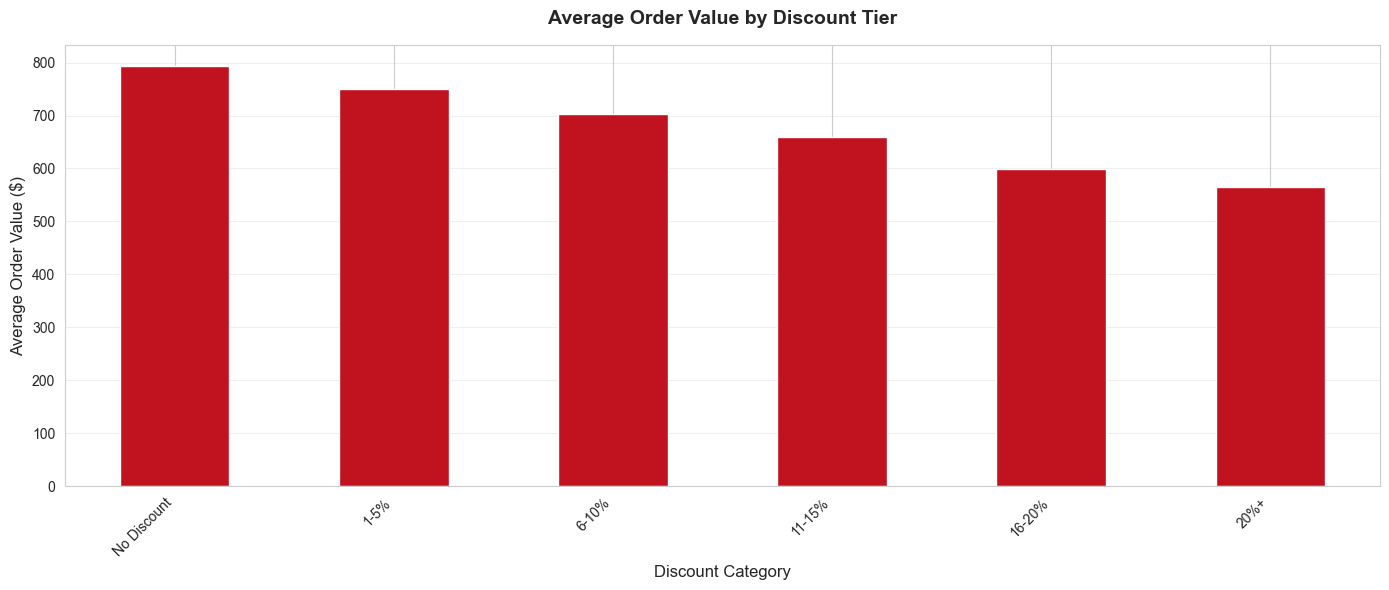


DISCOUNT IMPACT ANALYSIS
                   Total Revenue  Avg Order Value  Transactions  Units Sold
discount_category                                                          
No Discount          15930751.85           793.76         20070       53821
1-5%                  9364951.05           749.62         12493       33018
6-10%                 5231206.50           702.08          7451       19783
11-15%                3265979.42           659.53          4952       13162
16-20%                2058918.45           599.39          3435        8892
20%+                   902928.50           564.68          1599        4128


In [13]:
# Discount impact analysis
discount_impact = df.groupby('discount_category').agg({
    'revenue': ['sum', 'mean'],
    'transaction_id': 'count',
    'quantity': 'sum'
}).round(2)

discount_impact.columns = ['Total Revenue', 'Avg Order Value', 'Transactions', 'Units Sold']

plt.figure(figsize=(14, 6))
discount_impact['Avg Order Value'].plot(kind='bar', color='#C1121F')
plt.title('Average Order Value by Discount Tier', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Discount Category', fontsize=12)
plt.ylabel('Average Order Value ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../data/discount_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("DISCOUNT IMPACT ANALYSIS")
print("="*70)
print(discount_impact)

In [14]:
# Customer segmentation visualization
customer_type_analysis = df.groupby('customer_type').agg({
    'revenue': ['sum', 'mean'],
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).round(2)

customer_type_analysis.columns = ['Total Revenue', 'Avg Order Value', 'Transactions', 'Customers']
customer_type_analysis['Revenue Contribution %'] = (
    customer_type_analysis['Total Revenue'] / customer_type_analysis['Total Revenue'].sum() * 100
).round(2)

print("\n" + "="*70)
print("NEW VS RETURNING CUSTOMER ANALYSIS")
print("="*70)
print(customer_type_analysis)


NEW VS RETURNING CUSTOMER ANALYSIS
               Total Revenue  Avg Order Value  Transactions  Customers  \
customer_type                                                            
New              11023485.20           740.33         14890       7719   
Returning        25731250.57           732.88         35110       9721   

               Revenue Contribution %  
customer_type                          
New                             29.99  
Returning                       70.01  


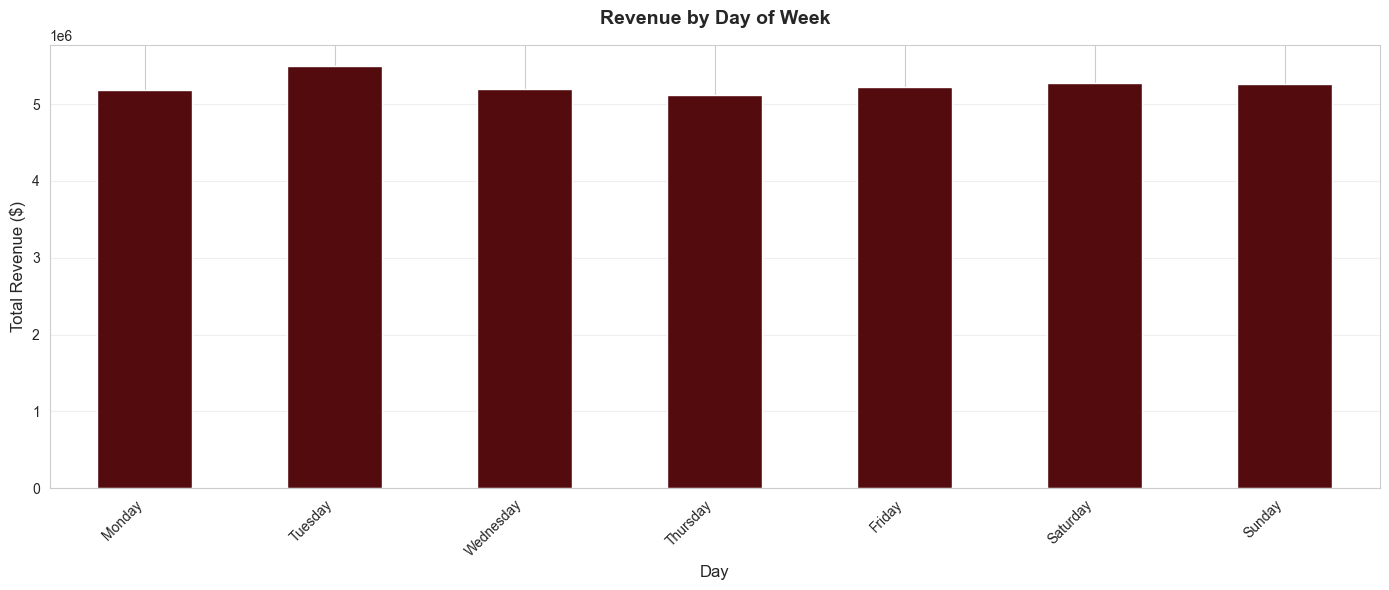

In [15]:
# Day of week analysis
day_analysis = df.groupby('day_name').agg({
    'revenue': ['sum', 'mean'],
    'transaction_id': 'count'
}).round(2)

day_analysis.columns = ['Total Revenue', 'Avg Order Value', 'Transactions']

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_analysis = day_analysis.reindex(day_order)

plt.figure(figsize=(14, 6))
day_analysis['Total Revenue'].plot(kind='bar', color='#540B0E')
plt.title('Revenue by Day of Week', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../data/day_of_week_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Key Business Metrics & KPIs

In [16]:
# Calculate core KPIs
print("="*70)
print("KEY PERFORMANCE INDICATORS (KPIs)")
print("="*70)

total_revenue = df['revenue'].sum()
total_transactions = df['transaction_id'].nunique()
unique_customers = df['customer_id'].nunique()
avg_order_value = df['revenue'].mean()
total_units_sold = df['quantity'].sum()

# Customer metrics
repeat_customers = df.groupby('customer_id')['transaction_id'].count()
repeat_purchase_rate = (repeat_customers > 1).sum() / len(repeat_customers) * 100

# Calculate CLV (simplified)
avg_clv = customer_features['lifetime_value'].mean()

# Revenue growth (last month vs previous)
monthly_rev = df.groupby('year_month')['revenue'].sum().sort_index()
if len(monthly_rev) >= 2:
    revenue_growth = ((monthly_rev.iloc[-1] - monthly_rev.iloc[-2]) / monthly_rev.iloc[-2]) * 100
else:
    revenue_growth = 0

# Conversion rate (proxy)
estimated_conversion_rate = (total_transactions / (unique_customers * 1.5)) * 100

kpi_summary = pd.DataFrame({
    'KPI': [
        'Total Revenue',
        'Revenue Growth (MoM)',
        'Total Transactions',
        'Unique Customers',
        'Average Order Value',
        'Customer Lifetime Value',
        'Repeat Purchase Rate',
        'Estimated Conversion Rate'
    ],
    'Value': [
        f'${total_revenue:,.2f}',
        f'{revenue_growth:.2f}%',
        f'{total_transactions:,}',
        f'{unique_customers:,}',
        f'${avg_order_value:.2f}',
        f'${avg_clv:.2f}',
        f'{repeat_purchase_rate:.2f}%',
        f'{estimated_conversion_rate:.2f}%'
    ]
})

print("\n")
for idx, row in kpi_summary.iterrows():
    print(f"{idx + 1}. {row['KPI']:.<50} {row['Value']:>15}")

print("\n" + "="*70)

KEY PERFORMANCE INDICATORS (KPIs)


1. Total Revenue.....................................  $36,754,735.77
2. Revenue Growth (MoM)..............................         -93.10%
3. Total Transactions................................          50,000
4. Unique Customers..................................           9,939
5. Average Order Value...............................         $735.09
6. Customer Lifetime Value...........................        $3698.03
7. Repeat Purchase Rate..............................          96.89%
8. Estimated Conversion Rate.........................         335.38%



## 6. Data Export for Tableau & Excel

In [17]:
# Clean and prepare final dataset
df_clean = df.copy()

# Export main dataset
df_clean.to_csv('../data/sales_data_clean.csv', index=False)
print("✓ Exported: sales_data_clean.csv")

# Export customer features
customer_features.to_csv('../data/customer_features.csv', index=False)
print("✓ Exported: customer_features.csv")

# Create aggregated monthly summary for Excel
monthly_summary = df.groupby('year_month').agg({
    'revenue': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique',
    'quantity': 'sum',
    'discount_amount': 'sum'
}).reset_index()

monthly_summary.columns = ['Month', 'Total_Revenue', 'Transactions', 
                            'Unique_Customers', 'Units_Sold', 'Total_Discounts']
monthly_summary['AOV'] = monthly_summary['Total_Revenue'] / monthly_summary['Transactions']
monthly_summary['Revenue_Per_Customer'] = monthly_summary['Total_Revenue'] / monthly_summary['Unique_Customers']

monthly_summary.to_csv('../data/monthly_summary.csv', index=False)
print("✓ Exported: monthly_summary.csv")

# Category summary for Tableau
category_summary = df.groupby('product_category').agg({
    'revenue': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique',
    'quantity': 'sum'
}).reset_index()

category_summary.columns = ['Category', 'Total_Revenue', 'Transactions', 
                             'Unique_Customers', 'Units_Sold']
category_summary.to_csv('../data/category_summary.csv', index=False)
print("✓ Exported: category_summary.csv")

# Regional summary
region_summary = df.groupby('region').agg({
    'revenue': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).reset_index()

region_summary.columns = ['Region', 'Total_Revenue', 'Transactions', 'Unique_Customers']
region_summary.to_csv('../data/region_summary.csv', index=False)
print("✓ Exported: region_summary.csv")

print("\n" + "="*70)
print("DATA EXPORT SUMMARY")
print("="*70)
print(f"\n1. sales_data_clean.csv - {len(df_clean):,} records (Full dataset)")
print(f"2. customer_features.csv - {len(customer_features):,} records (Customer analytics)")
print(f"3. monthly_summary.csv - {len(monthly_summary):,} records (Time series)")
print(f"4. category_summary.csv - {len(category_summary):,} records (Category performance)")
print(f"5. region_summary.csv - {len(region_summary):,} records (Regional analysis)")
print("\n🎯 All datasets ready for Tableau and Excel!")

✓ Exported: sales_data_clean.csv
✓ Exported: customer_features.csv
✓ Exported: monthly_summary.csv
✓ Exported: category_summary.csv


✓ Exported: region_summary.csv

DATA EXPORT SUMMARY

1. sales_data_clean.csv - 50,000 records (Full dataset)
2. customer_features.csv - 9,939 records (Customer analytics)
3. monthly_summary.csv - 33 records (Time series)
4. category_summary.csv - 12 records (Category performance)
5. region_summary.csv - 5 records (Regional analysis)

🎯 All datasets ready for Tableau and Excel!


## 7. Analysis Summary & Insights

In [18]:
print("="*70)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*70)

# Top insights
top_category = category_revenue.index[0]
top_region = region_performance.index[0]
top_channel = channel_analysis.index[0]

insights = f"""
📊 REVENUE INSIGHTS:
   • Total Revenue: ${total_revenue:,.2f} across {total_transactions:,} transactions
   • Top Category: {top_category} (${category_revenue.loc[top_category, 'revenue']:,.2f})
   • Top Region: {top_region} ({region_performance.loc[top_region, 'market_share']:.1f}% market share)
   • Leading Channel: {top_channel} ({channel_analysis.loc[top_channel, 'Revenue Share %']:.1f}% revenue share)

👥 CUSTOMER INSIGHTS:
   • {unique_customers:,} unique customers with {repeat_purchase_rate:.1f}% repeat purchase rate
   • Average Customer Lifetime Value: ${avg_clv:.2f}
   • Average Order Value: ${avg_order_value:.2f}

💡 ACTIONABLE RECOMMENDATIONS:
   1. Focus marketing on {top_category} - highest revenue generator
   2. Expand presence in {top_region} region - strongest market
   3. Optimize {top_channel.lower()} channel - drives majority of sales
   4. Implement retention campaigns - improve {repeat_purchase_rate:.1f}% repeat rate
   5. Test discount strategies - current avg discount: {df['discount'].mean()*100:.1f}%
"""

print(insights)

KEY INSIGHTS & RECOMMENDATIONS

📊 REVENUE INSIGHTS:
   • Total Revenue: $36,754,735.77 across 50,000 transactions
   • Top Category: Electronics ($18,756,617.33)
   • Top Region: North (22.2% market share)
   • Leading Channel: Offline (39.2% revenue share)

👥 CUSTOMER INSIGHTS:
   • 9,939 unique customers with 96.9% repeat purchase rate
   • Average Customer Lifetime Value: $3698.03
   • Average Order Value: $735.09

💡 ACTIONABLE RECOMMENDATIONS:
   1. Focus marketing on Electronics - highest revenue generator
   2. Expand presence in North region - strongest market
   3. Optimize offline channel - drives majority of sales
   4. Implement retention campaigns - improve 96.9% repeat rate
   5. Test discount strategies - current avg discount: 6.4%

